In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

%matplotlib inline

In [2]:
from Practise_Helper import *

## Linear Regression with One Variable

In [3]:
data = pd.read_csv("ex1data1.txt", sep=',', header=None)

In [4]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
columns = np.array(['Profit', 'Population'])
data.columns = columns

In [6]:
data.head()

,Profit,Population
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.isnull().sum()

Profit        0
Population    0
dtype: int64

In [8]:
data.corr()

,Profit,Population
Profit,1.000000,0.837873
Population,0.837873,1.000000


In [26]:
data.std()

Profit        3.869884
Population    5.510262
dtype: float64

In [9]:
X = data['Profit']
y = data['Population']

X = np.array(X).reshape((X.shape[0], -1))
y = np.array(y).reshape((X.shape[0], -1))

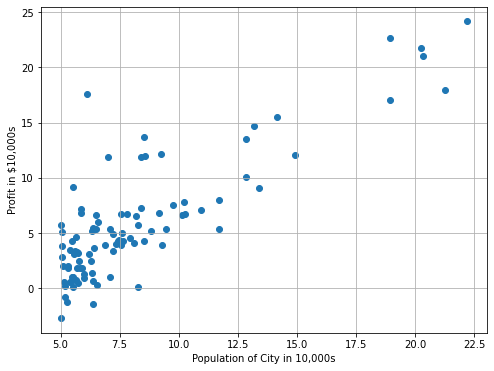

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.grid()
plt.show()

In [11]:
from Practise_Helper import *

In [12]:
X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([0, 0]).reshape((X_train.shape[1], -1))
alpha = 0.01
num_iters = 5000
criteria = 1e-8
theta, J_history = gradientDescent(X_train, y, theta, alpha, num_iters, criteria)

Gradient descent started...:  73%|███████▎  | 3647/5000 [00:00<00:00, 113963.42it/s]

Gradient descent is finished
Iteration ===> 3648
Stopping criteria ===> 1e-08


In [13]:
print(theta)

[[-3.89027341]
 [ 1.19248036]]


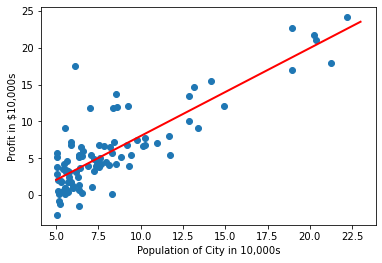

In [14]:
predicted_model = theta[0] + np.arange(5,24) * theta[1]

plt.figure()
plt.scatter(X, y)
plt.plot(np.arange(5,24), predicted_model,
         color="red", linewidth=2)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

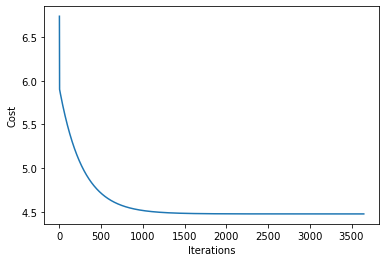

In [15]:
plt.figure()
plt.plot(np.arange(J_history[J_history > 0].size), J_history[J_history > 0])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [21]:
slope, intercept, r, p, std_err = stats.linregress(X[:,0], y[:,0])

In [27]:
print(slope)
print(intercept)
print(f"R-squared: {r**2:.6f}")
print(p)
print(std_err)

1.1930336441895941
-3.8957808783118555
R-squared: 0.702032
1.0232099778760524e-26
0.07974394383258741


## Linear regression with multiple variables

In [3]:
data = pd.read_csv("ex1data2.txt", sep=',', header=None)

In [4]:
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
columns = np.array(['Size of House', 'Number of Bedrooms', 'Price'])
data.columns = columns

In [6]:
data.head()

,Size of House,Number of Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Size of House,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
Number of Bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
Price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


In [8]:
X = np.array(data[['Size of House', 'Number of Bedrooms']]).reshape((47,2))
y = np.array(data['Price']).reshape((47,1))

In [9]:
X_train, mu, sigma = featureStandartization(X)

In [10]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

In [11]:
theta = np.zeros(3).reshape((3,1))
alpha = 0.01
num_iters = 1000
criteria = 1e-5
theta, J_history = gradientDescent(X_train, y, theta, alpha, num_iters, criteria)
print(theta)

Gradient descent started...: 100%|██████████| 1000/1000 [00:00<00:00, 83332.75it/s]

Gradient descent is finished
Iteration ===> 1000
Stopping criteria ===> 1e-05
[[340397.96353532]
 [109848.00846026]
 [ -5866.45408497]]


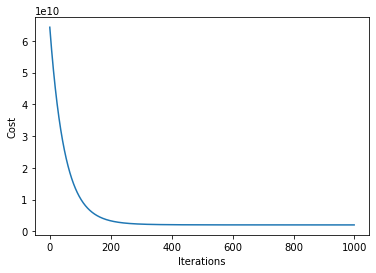

In [12]:
plt.figure()
plt.plot(np.arange(num_iters), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [16]:
model_regresyon_OLS = sm.OLS(endog=y, exog=X_train).fit()

In [17]:
model_regresyon_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.43e-13
Time:                        00:48:00   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.404e+05   9637.239     35.323      0.000    3.21e+05     3.6e+05
x1          1.106e+05   1.18e+04      9.409      0.000    8.69e+04    1.34e+05
x2         -6649.4743   1.18e+04     -0.566      0.575   -3.03e+04     1.7e+04
==============================================================================
Omnibus:                        4.083   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                2.977
Skew:                           0.567   Prob(JB):                        0.226
Kurtosis:                       3.484   Cond. No.                         1.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""